## 분류 모델 성능 평가

* 분류 모델 성능 평가
> 분류 모델은 정확도를 높여야한다. 예측값과 실제값이 많이 같을 수록 좋은 모델이다

* 정확도 accuracy

> 가장 직관적으로 모델 성능을 확인할 수 있다.

> TN+TP / TN+TP+FN+FP

* 정밀도 precision

> 1이라고 예측한 것 중에서 진짜 1인 비율

> TP / FP+TP

* 재현율 recall

> 실제 1을 1이라고 예측한 비율 / 높을수록 좋은 모델

> TP / FN+TP

* 특이도 specificity

> 0이라고 예측한 것에서 진짜 0인 것

> TN / TN+FP

* F1 Score

> 정밀도와 재현율의 조화평균

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

### 데이터 분리

In [4]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [5]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022) 

### 모델링

In [6]:
#불러오기 # KNeighborsClassifier와 KNeighborsRegressor 잘 구분하기!!
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
#선언하기
model=KNeighborsClassifier()

In [8]:
#학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
#예측하기
y_pred = model.predict(x_test)

### 분류 성능 평가

In [10]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(confusion_matrix(y_test, y_pred))

[[74  9]
 [ 8 59]]


<AxesSubplot:>

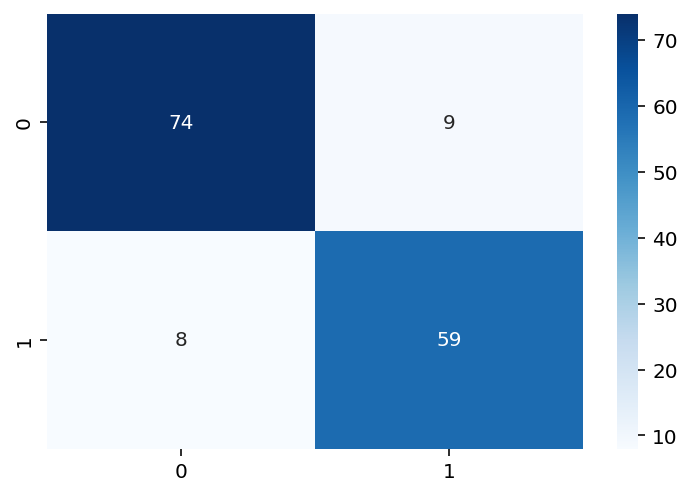

In [11]:
# 시각화하기

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [12]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8866666666666667

In [13]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

# 그리고 두가지가 아닌 3가지 4가지 값이 나오는 경우는 average=none 값을 준다.
# 합의 평균이 아닌 각각의 값을 구해주기 때문

0.8676470588235294

In [14]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8805970149253731

In [16]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.874074074074074

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#표를 볼 때, 정확도와 0과1의 값이 왜 낮고 높은지? 에 대해서만 알면된다.

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        83
           1       0.87      0.88      0.87        67

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

